In [90]:
import numpy as np 
import pandas as pd 

In [92]:
df=pd.read_csv("C:\\Users\\Choud\\Downloads\\dsjob - dsjob.csv")
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [94]:
# cca---> complete case analysis 
# df ----> missing value ---> filter missing data --->
# new_df---> missinng data drop
# architectur ---> histrogram ---> 
# past column in which we have missing data
# update column in which  we have no missing data
# if post data architecture is over lap to new data missing data 
## if past data architecture  is not over lap to data architrcture ---> it mean we can not drop missing data

In [96]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [98]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.860968
relevent_experience        0.000000
enrolled_university        1.456083
education_level            2.442461
major_discipline          14.654767
experience                 0.234852
company_size              29.215594
company_type              29.779239
last_new_job               1.878816
training_hours             0.000000
dtype: float64

In [102]:
clos=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]

In [104]:
clos

['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [106]:
df[clos].sample(5)

,enrolled_university,education_level,experience,last_new_job
284,Full time course,Graduate,3,1
504,no_enrollment,Masters,<1,1
184,no_enrollment,Graduate,7,1
657,no_enrollment,Graduate,17,>4
878,Full time course,Graduate,11,1


In [108]:
df['education_level'].value_counts()

education_level
Graduate          1269
Masters            496
High School        222
Phd                 54
Primary School      36
Name: count, dtype: int64

In [110]:
len(df[clos].dropna())/len(df)

0.9478628464067638

In [112]:
new_df=df[clos].dropna()
df.shape,new_df.shape

((2129, 13), (2018, 4))

In [114]:
import matplotlib.pyplot as plt

<Axes: >

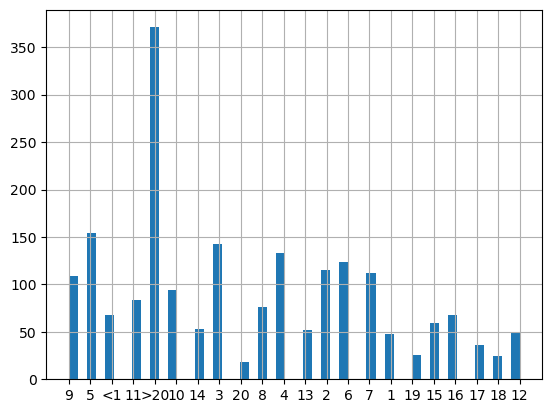

In [116]:
fig =plt.figure()
ax=fig.add_subplot(111)
# original data
df['experience'].hist(bins=50,ax=ax,density=True,color='red')
## data after cca the argument alpha makes the color transpaent  ,so we can 
## see the overlay of the 2 distribution
new_df['experience'].hist(bins=50)

<Axes: >

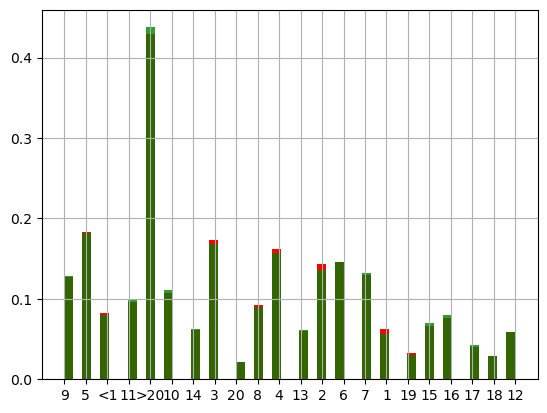

In [118]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original data
df['experience'].hist(bins = 50, ax=ax,density = True , color = 'red')

#data after cca , the argumnet alpha males the color transparent ,  so we can
# see the overlay of the 2 distributions 
new_df['experience'].hist(bins = 50 , ax =ax , color = 'green' , density = True , alpha = 0.8)

In [125]:
temp = pd.concat([
    # percentage of observations per category, original data
    df['enrolled_university'].value_counts() / len(df),

    # percentage of observations per category, cca data
    new_df['enrolled_university'].value_counts() / len(new_df)
], axis=1)

# add column names
temp.columns = ['original', 'cca']

temp


,original,cca
enrolled_university,,
no_enrollment,0.713481,0.727948
Full time course,0.204321,0.202180
Part time course,0.067637,0.069871
